<a href="https://colab.research.google.com/github/NiceTry-NiceTry/Responsi-Pengolahan-Sinyal-Digital/blob/main/Kode%20Program%20Responsi%20PSD-05%20Gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Siapkan Dataset
import gdown
file_id = '1aFvFbShnfyxT3mV9AJ4BEhjx_elJfmVp'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'Dataset.zip', quiet=False)
!unzip Dataset.zip


Downloading...
From (original): https://drive.google.com/uc?id=1aFvFbShnfyxT3mV9AJ4BEhjx_elJfmVp
From (redirected): https://drive.google.com/uc?id=1aFvFbShnfyxT3mV9AJ4BEhjx_elJfmVp&confirm=t&uuid=b439ca72-4f13-4e49-9761-efe2801aa53c
To: /content/Dataset.zip
100%|██████████| 289M/289M [00:02<00:00, 135MB/s]


Streaming output truncated to the last 5000 lines.
  inflating: Dataset1/Train/Real/real_9557.jpg  
  inflating: Dataset1/Train/Real/real_9558.jpg  
  inflating: Dataset1/Train/Real/real_9559.jpg  
  inflating: Dataset1/Train/Real/real_956.jpg  
  inflating: Dataset1/Train/Real/real_9560.jpg  
  inflating: Dataset1/Train/Real/real_9561.jpg  
  inflating: Dataset1/Train/Real/real_9562.jpg  
  inflating: Dataset1/Train/Real/real_9563.jpg  
  inflating: Dataset1/Train/Real/real_9564.jpg  
  inflating: Dataset1/Train/Real/real_9565.jpg  
  inflating: Dataset1/Train/Real/real_9566.jpg  
  inflating: Dataset1/Train/Real/real_9567.jpg  
  inflating: Dataset1/Train/Real/real_9568.jpg  
  inflating: Dataset1/Train/Real/real_9569.jpg  
  inflating: Dataset1/Train/Real/real_957.jpg  
  inflating: Dataset1/Train/Real/real_9570.jpg  
  inflating: Dataset1/Train/Real/real_9571.jpg  
  inflating: Dataset1/Train/Real/real_9572.jpg  
  inflating: Dataset1/Train/Real/real_9573.jpg  
  inflating: Dataset

In [2]:
#import import
#sarjana import
import tensorflow as tf
from tensorflow.keras.layers import Input, Layer, Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization, Activation, GlobalAveragePooling2D,AveragePooling2D
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score,recall_score, f1_score
import os
import seaborn as sns
import pandas as pd
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
#siapkan data untuk training, validasi, dan tes
dir = "/content/Dataset1"
train_dir = os.path.join(dir,'Train/')
val_dir = os.path.join(dir,'Validation/')
test_dir = os.path.join(dir,'Test/')

In [4]:
img_size = 224
batch_size = 64 #//

# GANTI BAGIAN INI
train_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,       # Rotasi gambar hingga 20 derajat
    width_shift_range=0.2,   # Geser ke kiri/kanan
    height_shift_range=0.2,  # Geser ke atas/bawah
    shear_range=0.2,         # Efek miring (shear)
    zoom_range=0.2,          # Zoom in/out
    horizontal_flip=True,    # Membalik gambar horizontal
    brightness_range=[0.8, 1.2], # Variasi kecerahan (penting untuk deepfake!)
    fill_mode='nearest'
)
datagen = ImageDataGenerator(rescale=1./255)


train_gen = train_generator.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

test_gen = datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

print(f"Total data Training: {train_gen.samples}")
print(f"Total data Validasi: {val_gen.samples}")
print(f"Total data Test: {test_gen.samples}")

Found 21006 images belonging to 2 classes.
Found 4506 images belonging to 2 classes.
Found 4506 images belonging to 2 classes.
Total data Training: 21006
Total data Validasi: 4506
Total data Test: 4506


In [5]:
# GANTI SELURUH CELL 5 DENGAN INI
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import BatchNormalization

# Menggunakan Xception sebagai base model (State-of-the-art untuk Deepfake)
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Bekukan base model terlebih dahulu
base_model.trainable = False

# Membangun arsitektur baru (Head)
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Layer Dense pertama dengan regularisasi
x = Dense(512, activation='relu')(x)
x = BatchNormalization() (x)  # Menstabilkan training
x = Dropout(0.5)(x)           # Dropout 50% untuk mengurangi overfitting parah

# Layer Dense kedua (opsional, tapi membantu untuk fitur kompleks)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

# Output Layer
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=0.0001), # Learning rate awal kecil
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 55, 55,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add[0][0]       

 Total params: 22,044,201 (84.09 MB)

 Trainable params: 1,181,697 (4.51 MB)

 Non-trainable params: 20,862,504 (79.58 MB)

In [6]:
# GANTI SELURUH CELL 6 DENGAN INI
from tensorflow.keras.callbacks import ReduceLROnPlateau

checkpoint = ModelCheckpoint(
    'Deepfake_Best_Model.keras', # Ganti nama file agar tidak tertukar
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Stop jika tidak ada perbaikan selama 5 epoch
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min', # Biasanya monitor val_loss dengan mode min
    restore_best_weights=True
)

# Kurangi Learning Rate jika loss stagnan (PENTING)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,     # Kurangi LR jadi 20% dari sebelumnya
    patience=2,     # Tunggu 2 epoch sebelum mengurangi
    min_lr=1e-6,    # Batas bawah LR
    verbose=1
)

# Train dengan 20 epoch (biarkan early stopping yang menghentikan)
history = model.fit(
    train_gen,
    epochs=20,
    validation_data = val_gen,
    callbacks=[checkpoint, early_stopping, reduce_lr] # Tambahkan reduce_lr
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 972ms/step - accuracy: 0.6104 - loss: 0.9669
Epoch 1: val_accuracy improved from -inf to 0.69574, saving model to Deepfake_Best_Model.keras
329/329 ━━━━━━━━━━━━━━━━━━━━ 394s 1s/step - accuracy: 0.6106 - loss: 0.9663 - val_accuracy: 0.6957 - val_loss: 0.5564 - learning_rate: 1.0000e-04
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 929ms/step - accuracy: 0.7118 - loss: 0.6477
Epoch 2: val_accuracy improved from 0.69574 to 0.70084, saving model to Deepfake_Best_Model.keras
329/329 ━━━━━━━━━━━━━━━━━━━━ 328s 995ms/step - accuracy: 0.7118 - loss: 0.6476 - val_accuracy: 0.7008 - val_loss: 0.6093 - learning_rate: 1.0000e-04
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 932ms/step - accuracy: 0.7367 - loss: 0.5701
Epoch 3: val_accuracy improved from 0.70084 to 0.75588, saving model to Deepfake_Best_Model.keras
329/329 ━━━━━━━━━━━━━━━━━━━━ 328s 997ms/step - accuracy: 0.7367 - loss: 0.5701 - val_accuracy: 0.7559 - val_loss: 0.5126 - learning_rate: 1.0000e-04
E

70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 295ms/step - accuracy: 0.6902 - loss: 0.6228
Test Loss: 0.5912195444107056
Test Accuracy: 0.7098214030265808


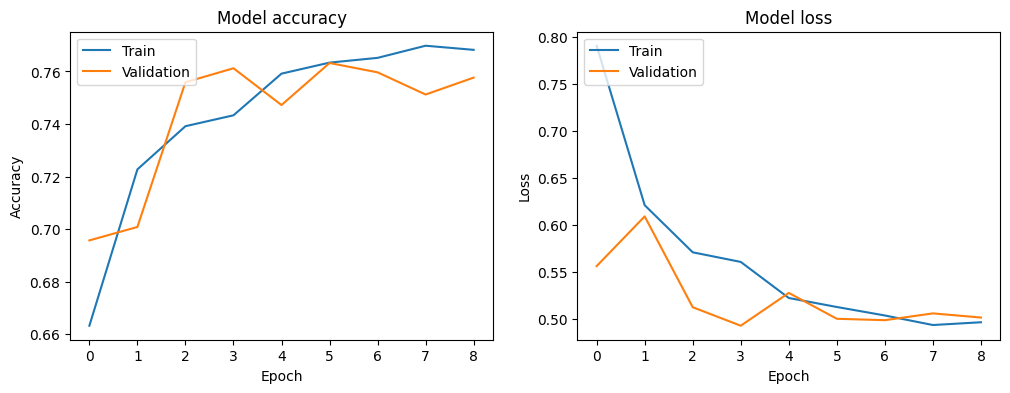

70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 288ms/step

Classification Report:
              precision    recall  f1-score   support

        Fake       0.68      0.77      0.72      2253
        Real       0.73      0.63      0.68      2227

    accuracy                           0.70      4480
   macro avg       0.71      0.70      0.70      4480
weighted avg       0.70      0.70      0.70      4480



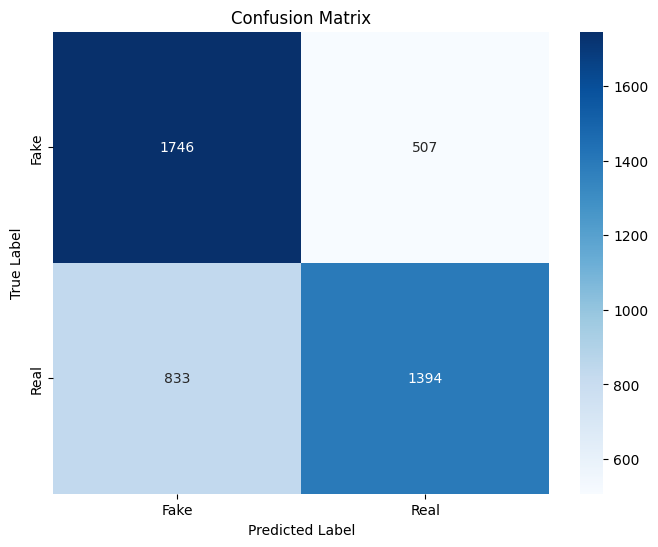

In [7]:
#evaluasi model
test_loss, test_accuracy= model.evaluate(
    test_gen,
    steps=test_gen.samples // test_gen.batch_size,
)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
#Lihat History Fine-Tuning
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Make predictions on the test data
predictions = model.predict(test_gen, steps=test_gen.samples // test_gen.batch_size)
# Jika probabilitas > 0.6 baru dianggap kelas 1 (misal Real).
# Ini akan memaksa model lebih sensitif terhadap kelas 0 (Fake).
# Sesuaikan angka 0.6 ini. Jika Fake=0, naikkan threshold (misal 0.7) agar lebih banyak yang masuk kelas 0.
y_pred = (predictions > 0.6).astype(int).flatten()

# Get true labels
y_true = test_gen.classes[:len(y_pred)]

# Get class names
class_names = list(test_gen.class_indices.keys())

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()